In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [101]:
data = pd.read_csv("semeion.data.txt",sep = "\s+",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [102]:
data.shape

(1593, 266)

In [103]:
#Перемешиваем строки таблицы
data = data.sample(frac=1).reset_index(drop=True)

In [104]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1


In [105]:
def Draw(k):
    img = BinImg(k)
    plt.imshow(img, cmap='gray', interpolation='nearest');

In [106]:
def BinImg(k):
    binimg= [[0 for x in range(16)] for y in range(16)]
    row = DataRow(k)
    binimg = np.reshape(row, (-1,16))
    return binimg

In [107]:
def DataRow (k):
    row=data[k:k+1].values
    row = row[0][:-10]
    return row

In [108]:
def Check(k):
    row=data[k:k+1].values
    for i in range(10):
        if row[0][256+i]>0. :
            number =i 
    return number

In [109]:
BinImg(1550)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,

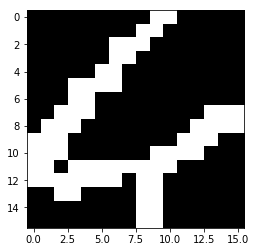

In [110]:
Draw (1550)

In [111]:
Check(1550)

4

In [112]:
def Train(val):
    x_train= []
    y_train= []
    for k in range(val):
        x_train.append(DataRow(k))
        y_train.append(Check(k))
    x_train= np.asarray(x_train)
    y_train= np.asarray(y_train)
    return x_train, y_train

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
def kNN(k, test_id):
    KNN = KNeighborsClassifier(k)
    KNN.fit(train_x, train_y)

    test = np.array(DataRow(test_id))
    test = test.reshape(1,-1)
    # Draw(test_id)

    result = KNN.predict(test)[0]
    #print "I think it's "+ str(result)+ " ,but actually it's "+ str(check(test_id))
    return result, Check(test_id)

In [115]:
#Параметры
TrainingSize= 1500
NeighboursQuantity =15

train = Train(TrainingSize)
train_x = train[0]
train_y = train[1]

In [116]:
correct = wrong =0
for test in range(TrainingSize,data.shape[0]):
    res= kNN(NeighboursQuantity,test)
    if res[0]==res[1]:
        correct+=1
    else: 
        wrong+=1
accuracy = 100*correct/(correct+wrong)
print "Correct: " +str(correct)+ "  Wrong: "+str(wrong) +"  Accuracy: " +str(accuracy)+"%" 
        

Correct: 81  Wrong: 12  Accuracy: 87%
